# Computer Vision Project : Enhancing Nucleus Segmentation and 3D Reconstruction Using Super-Resolution


## Group Members:
### Rita Sulaiman – Student ID: 2210765051
### Zeynep Yıldız – Student ID: 2210765033
### Zharasbek Bimagambetov – Student ID: 2210356185


### Imports

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt


### Preprocessing and Image Display

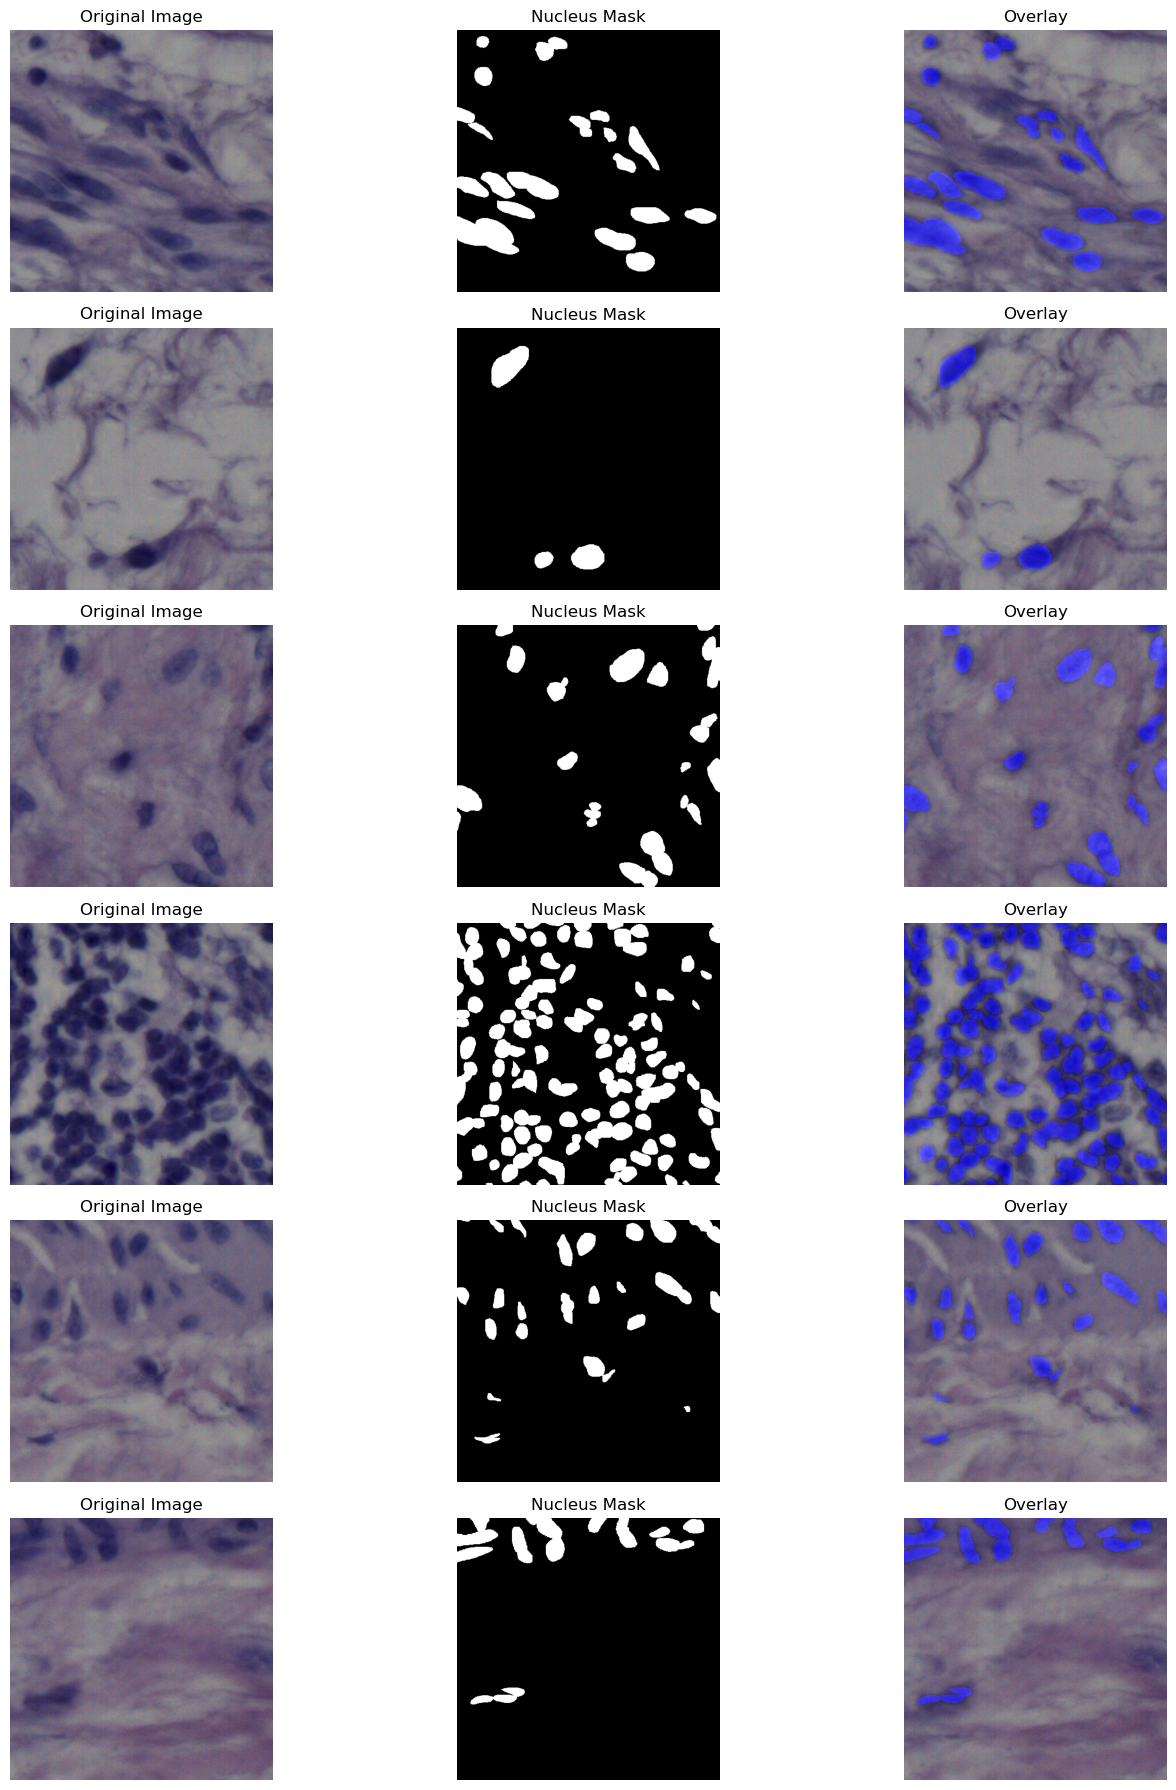

 Preprocessing complete
X shape: (12, 256, 256, 3)
Y shape: (12, 256, 256, 1)


In [13]:
# ================================
#  CONFIGURATION
# ================================

# Set base dataset directory (adjust if needed)
BASE_DIR = "."  # or use full path if notebook is outside the dataset folder
IMAGE_DIR = os.path.join(BASE_DIR, "tissue images")
MASK_DIR = os.path.join(BASE_DIR, "mask binary")  # or "label masks"

# Image size for model input
TARGET_SIZE = (256, 256)

# ================================
#  PREPROCESSING FUNCTIONS
# ================================

def preprocess_image(image, target_size):
    image = cv2.resize(image, target_size)
    image = image.astype(np.float32) / 255.0
    return image

def preprocess_mask(mask, target_size):
    mask = cv2.resize(mask, target_size)
    _, mask = cv2.threshold(mask, 127, 255, cv2.THRESH_BINARY)
    mask = mask.astype(np.float32) / 255.0
    mask = np.expand_dims(mask, axis=-1)  # Shape: (H, W, 1)
    return mask

# ================================
#  LOAD, DISPLAY, AND PREPROCESS
# ================================

image_files = sorted(os.listdir(IMAGE_DIR))
mask_files = sorted(os.listdir(MASK_DIR))

X = []  # Preprocessed images
Y = []  # Preprocessed masks

num_samples = min(6, len(image_files))  # For visualization
fig, axes = plt.subplots(num_samples, 3, figsize=(15, num_samples * 3))

for i in range(len(image_files)):
    img_path = os.path.join(IMAGE_DIR, image_files[i])
    mask_path = os.path.join(MASK_DIR, mask_files[i])

    #  Load original image and grayscale mask
    image_bgr = cv2.imread(img_path, cv2.IMREAD_COLOR)
    mask_gray = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

    #  Convert to RGB
    image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

    #  Display-only section
    if i < num_samples:
        overlay = image_rgb.copy()
        color_mask = np.zeros_like(image_rgb)
        color_mask[:, :, 2] = mask_gray  # red channel
        overlay = cv2.addWeighted(image_rgb, 1, color_mask, 0.5, 0)

        axes[i, 0].imshow(image_rgb)
        axes[i, 0].set_title("Original Image")
        axes[i, 0].axis("off")

        axes[i, 1].imshow(mask_gray, cmap="gray")
        axes[i, 1].set_title("Nucleus Mask")
        axes[i, 1].axis("off")

        axes[i, 2].imshow(overlay)
        axes[i, 2].set_title("Overlay")
        axes[i, 2].axis("off")

    #  Preprocess and store for training
    image = preprocess_image(image_rgb, TARGET_SIZE)
    mask = preprocess_mask(mask_gray, TARGET_SIZE)

    X.append(image)
    Y.append(mask)

plt.tight_layout()
plt.show()

# Convert lists to arrays
X = np.array(X)
Y = np.array(Y)

print(" Preprocessing complete")
print("X shape:", X.shape)
print("Y shape:", Y.shape)
